In [1]:
# 该文件用于处理数据并可视化
import csv 
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#加上这句话，图片会嵌入notebook而不是跳出新窗口查看图片
%matplotlib inline
# 绘制漂亮的图形，避免模糊的图像
%config InlineBackend.figure_format = 'retina'
# 设置环境
sns.set_context('notebook')
sns.set(style="ticks", color_codes=True)
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 启用多个单元输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# 设置好需要处理的文件路径
file_path_list = ["/home/xzhang/Documents/我的模型/data/statistics/xavier_norm.csv","/home/xzhang/Documents/我的模型/data/statistics/xavier_uniform.csv","/home/xzhang/Documents/我的模型/data/statistics/kaiming_norm.csv","/home/xzhang/Documents/我的模型/data/statistics/kaiming_uniform.csv"]
file_path = "/home/xzhang/Documents/我的模型/data/statistics/xavier_norm.csv"

In [3]:

# 定义写入csv文件函数，用于训练阶段将数据保存起来
def write_csv(my_dict, file_name):
    nb_cols = len(list(my_dict.keys()))
    nb_rows = len(my_dict[f"{1}"])
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # 写入表头
        header = ['iters'] + list(range(nb_cols))
        writer.writerow(header)        
        # 写入数据
        for i in range(nb_rows):
            row = [i] + [my_dict[f"{j}"][i] for j in range(nb_cols)]
            writer.writerow(row)
            


In [4]:
# 把所有数据都读进来，然后再做整理，我打算把这个表沿着列拼接试一试呗
df_list = list()
for file in file_path_list:
    name = file.split('/')[-1].split('.')[0]
    type = name.split('_')[0]
    dist = name.split('_')[1]
    df = pd.read_csv(file)
    df = df.iloc[:,1:]
    
    type = pd.Series([type]*len(df),name = 'type')
    dist = pd.Series([dist]*len(df),name = 'dist')
    test = pd.Series(list(range(len(df))),name='test')
    df.insert(0,'test',test)
    df.insert(1,'type',type)
    df.insert(2,'dist',dist)

    df_list.append(df) 
df_brut = pd.concat(df_list,axis=0) 
df_brut.head()

,test,type,dist,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,0,xavier,norm,15.135532,15.455892,14.902481,16.463407,15.049635,14.945483,14.749476,...,15.769883,15.697614,14.992511,15.065436,15.525867,16.293560,15.376797,15.838948,15.910422,14.672641
1,1,xavier,norm,15.912089,14.263601,16.202816,18.500820,15.390809,14.322951,14.431443,...,14.671829,15.358420,15.194771,13.903824,15.596476,18.336168,13.735839,15.342187,15.031216,14.061308
2,2,xavier,norm,13.735394,15.990006,14.219742,14.406396,12.365050,14.351375,14.485740,...,12.598007,15.802293,15.510954,12.879638,12.505471,13.295674,20.234616,16.850599,13.654572,14.184170
3,3,xavier,norm,11.336924,14.999240,14.593254,14.282541,10.722872,11.086061,15.000463,...,16.465869,16.556236,12.224306,15.488514,15.829162,16.907124,17.306463,12.310027,15.110073,13.699815
4,4,xavier,norm,14.334440,17.438489,15.474306,15.419760,11.605507,16.524572,16.725962,...,17.848944,16.719022,16.998933,16.702031,15.566593,18.113839,18.742432,15.544859,15.075610,14.432214


In [5]:
# 把测试数据读进来,找到峰值和对应的迭代次数
df_list = list()
for file in file_path_list:
    name = file.split('/')[-1].split('.')[0]
    type = name.split('_')[0]
    dist = name.split('_')[1]
    df = pd.read_csv(file)
    df = df.iloc[:,1:]
    
    max_values = df.max()
    max_indexes = df.idxmax()
    
    df_new = pd.concat([max_values,max_indexes],axis=1).reset_index()
    df_new.columns = ['test', 'max_value', 'max_index']
    type = pd.Series([type]*len(max_values),name = 'type')
    dist = pd.Series([dist]*len(max_indexes),name = 'dist')
    df_new.insert(1,'type',type)
    df_new.insert(2,'dist',dist)
    df_list.append(df_new)   
df = pd.concat(df_list,axis=0)
df.tail()
df.head()
df.describe()

,test,type,dist,max_value,max_index
95,95,kaiming,uniform,27.659766,171
96,96,kaiming,uniform,27.954230,196
97,97,kaiming,uniform,27.891254,1951
98,98,kaiming,uniform,27.691349,2680
99,99,kaiming,uniform,27.748243,172


,test,type,dist,max_value,max_index
0,0,xavier,norm,27.618218,4750
1,1,xavier,norm,27.587095,4875
2,2,xavier,norm,27.811154,7660
3,3,xavier,norm,27.909469,8284
4,4,xavier,norm,28.010666,6936


,max_value,max_index
count,400.000000,400.000000
mean,27.890071,2704.427500
std,0.209554,3006.085368
min,27.487681,123.000000
25%,27.740449,390.000000
50%,27.876227,765.500000
75%,28.017488,5152.750000
max,28.616715,9994.000000


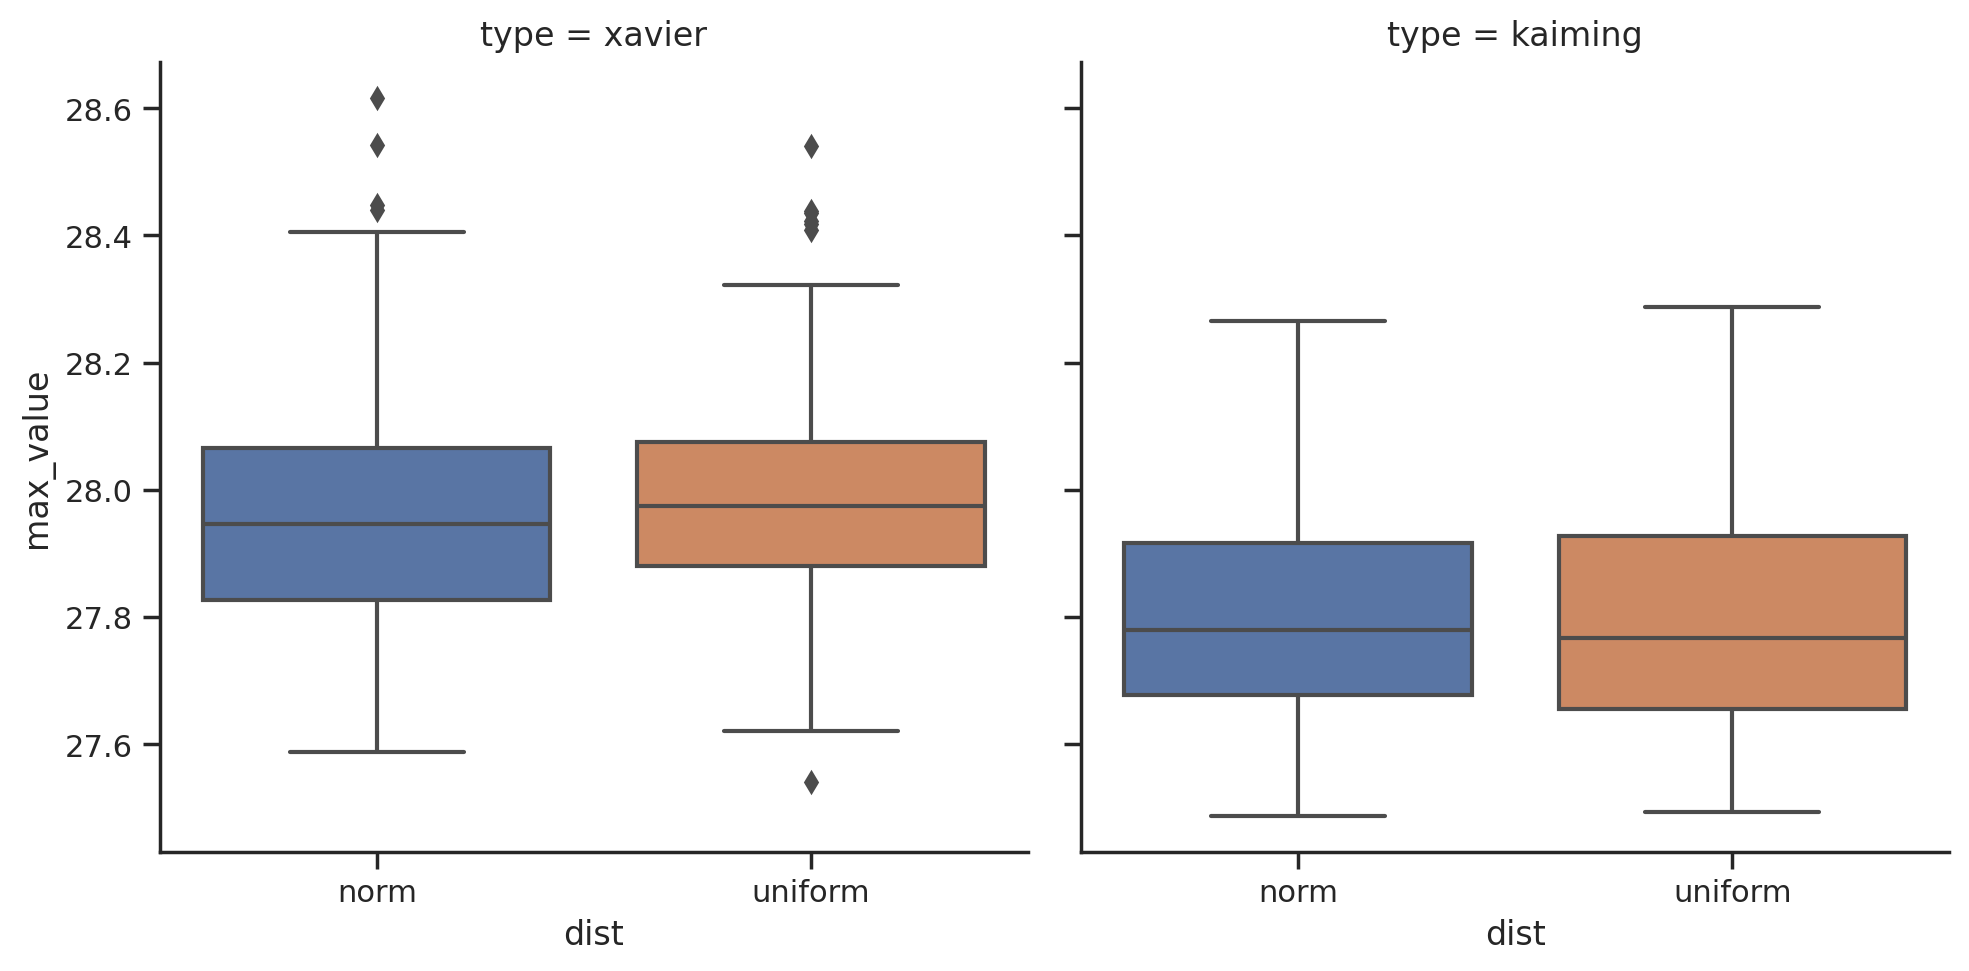

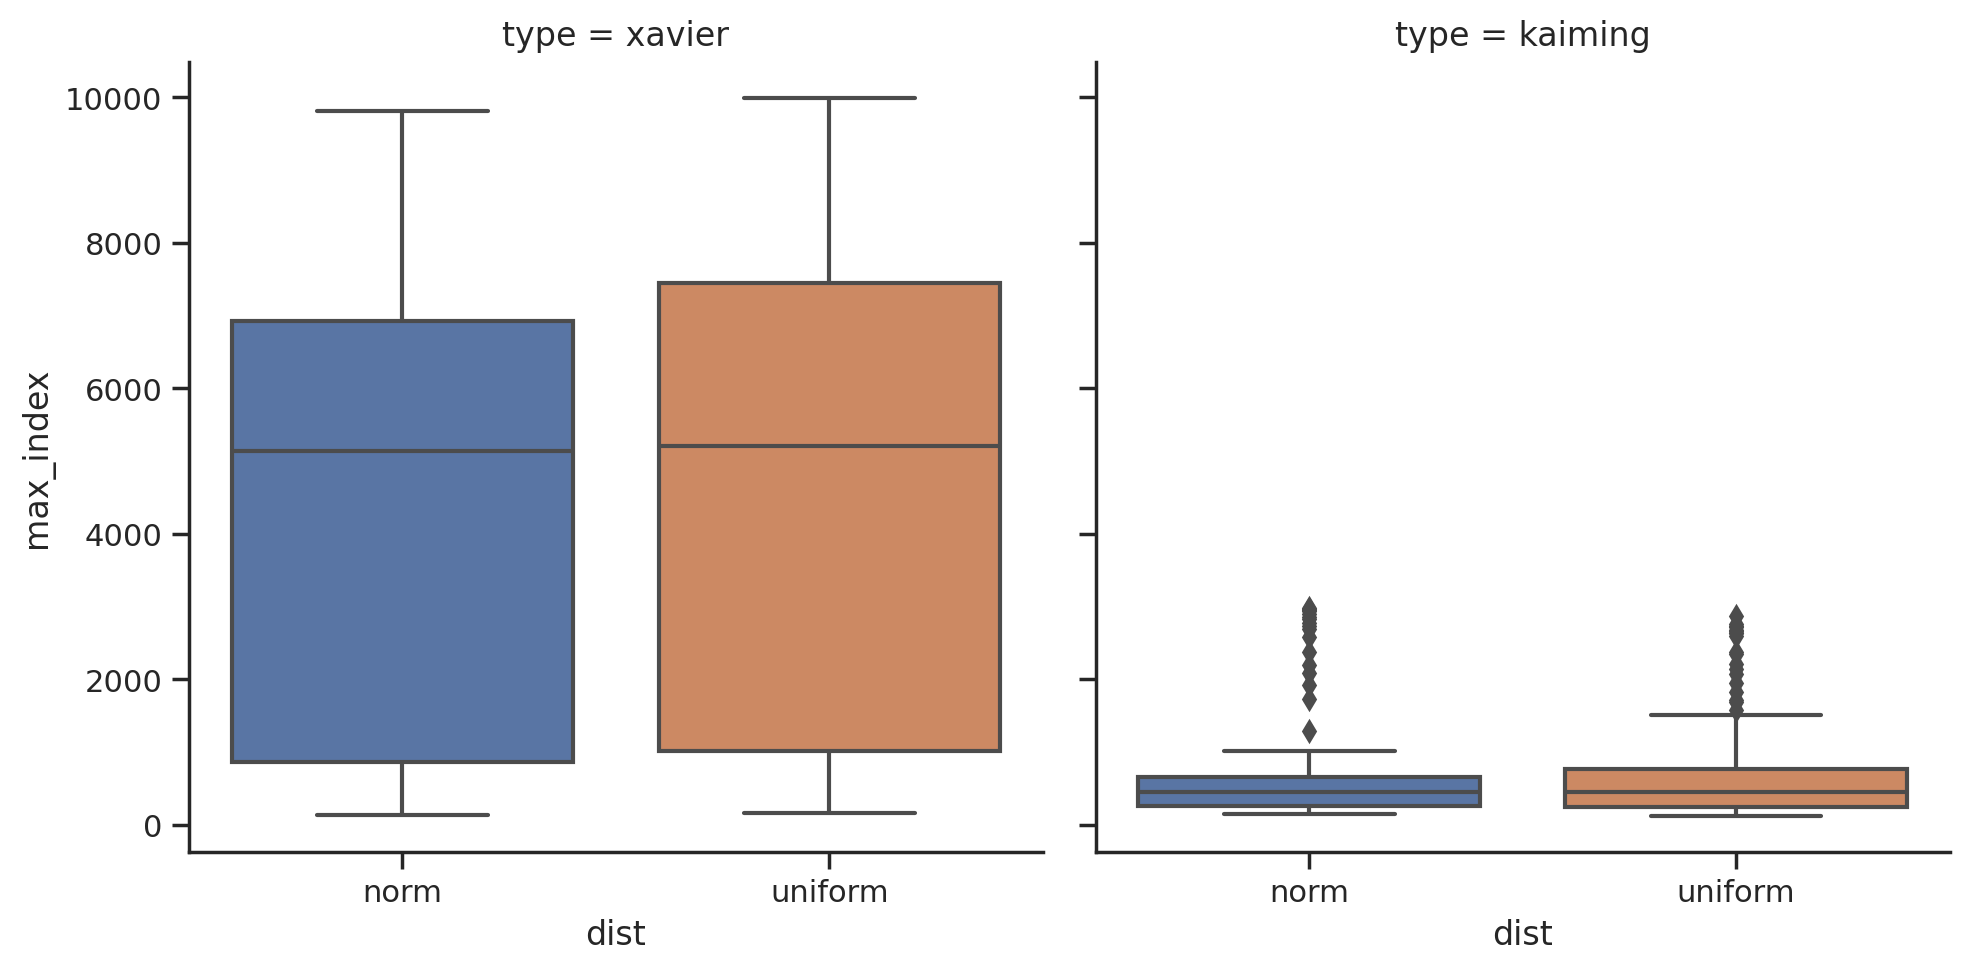

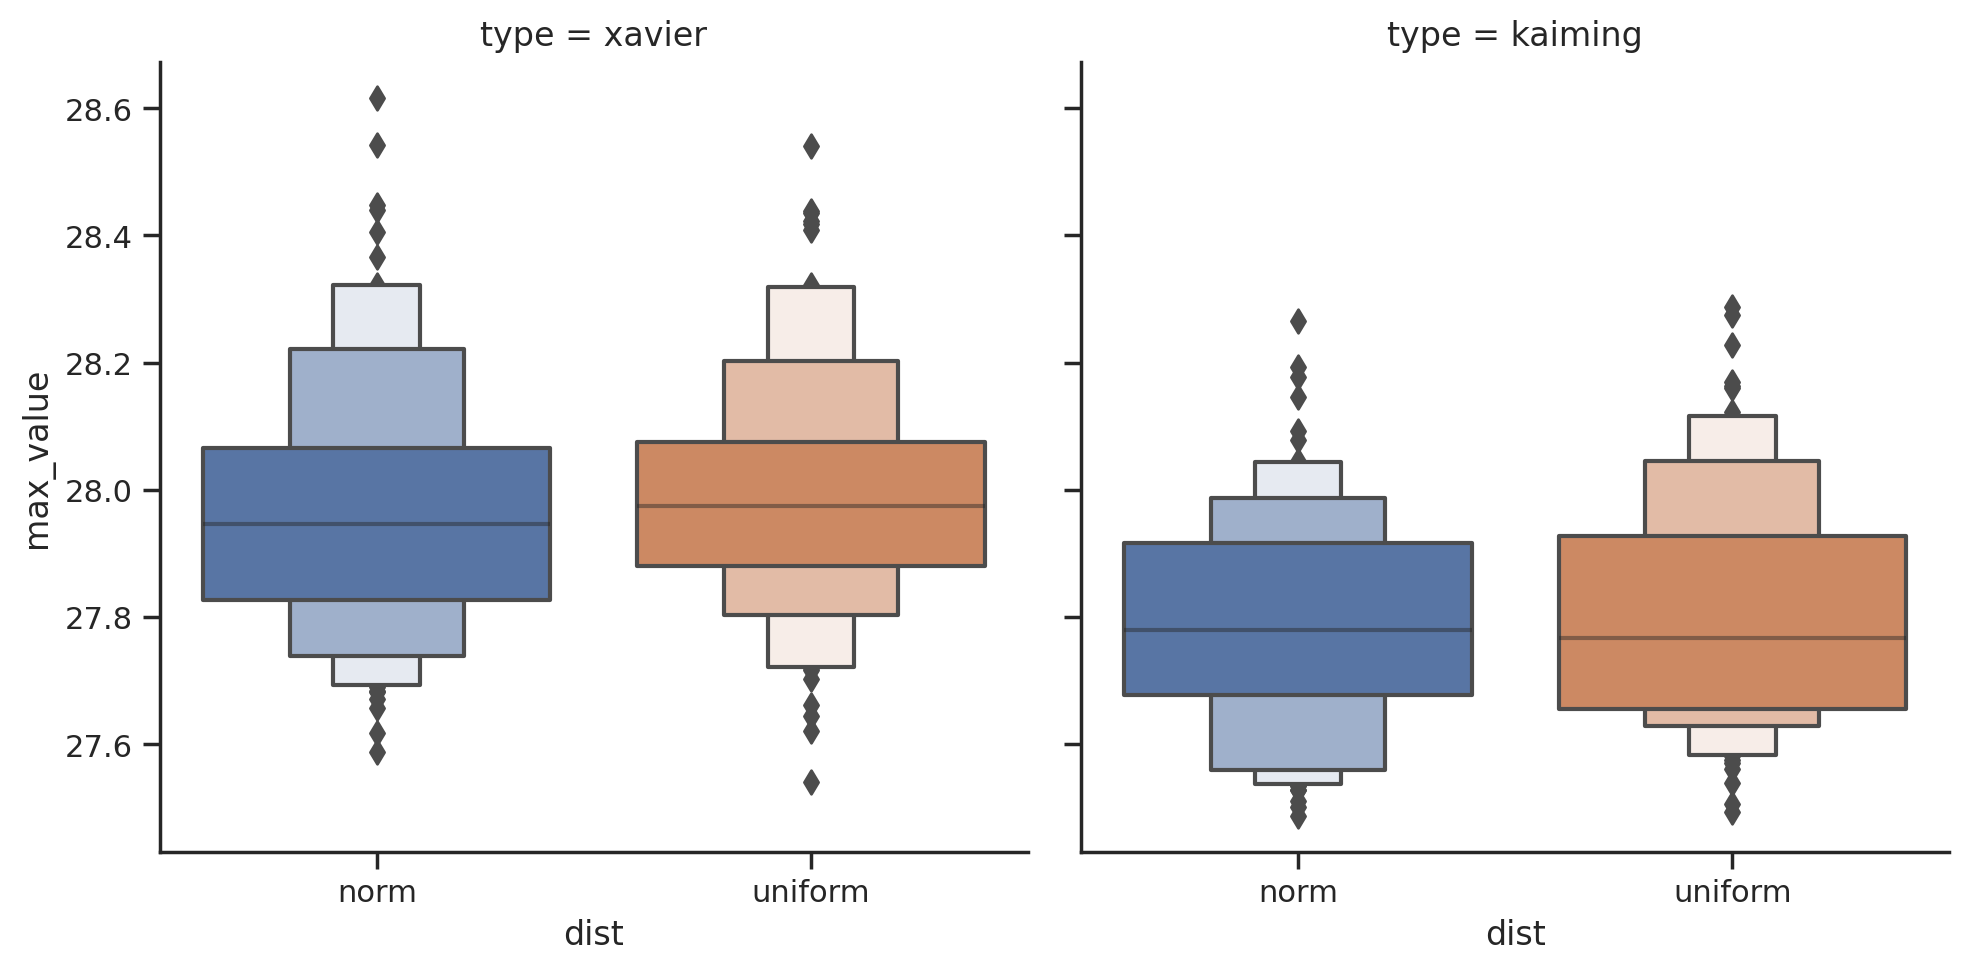

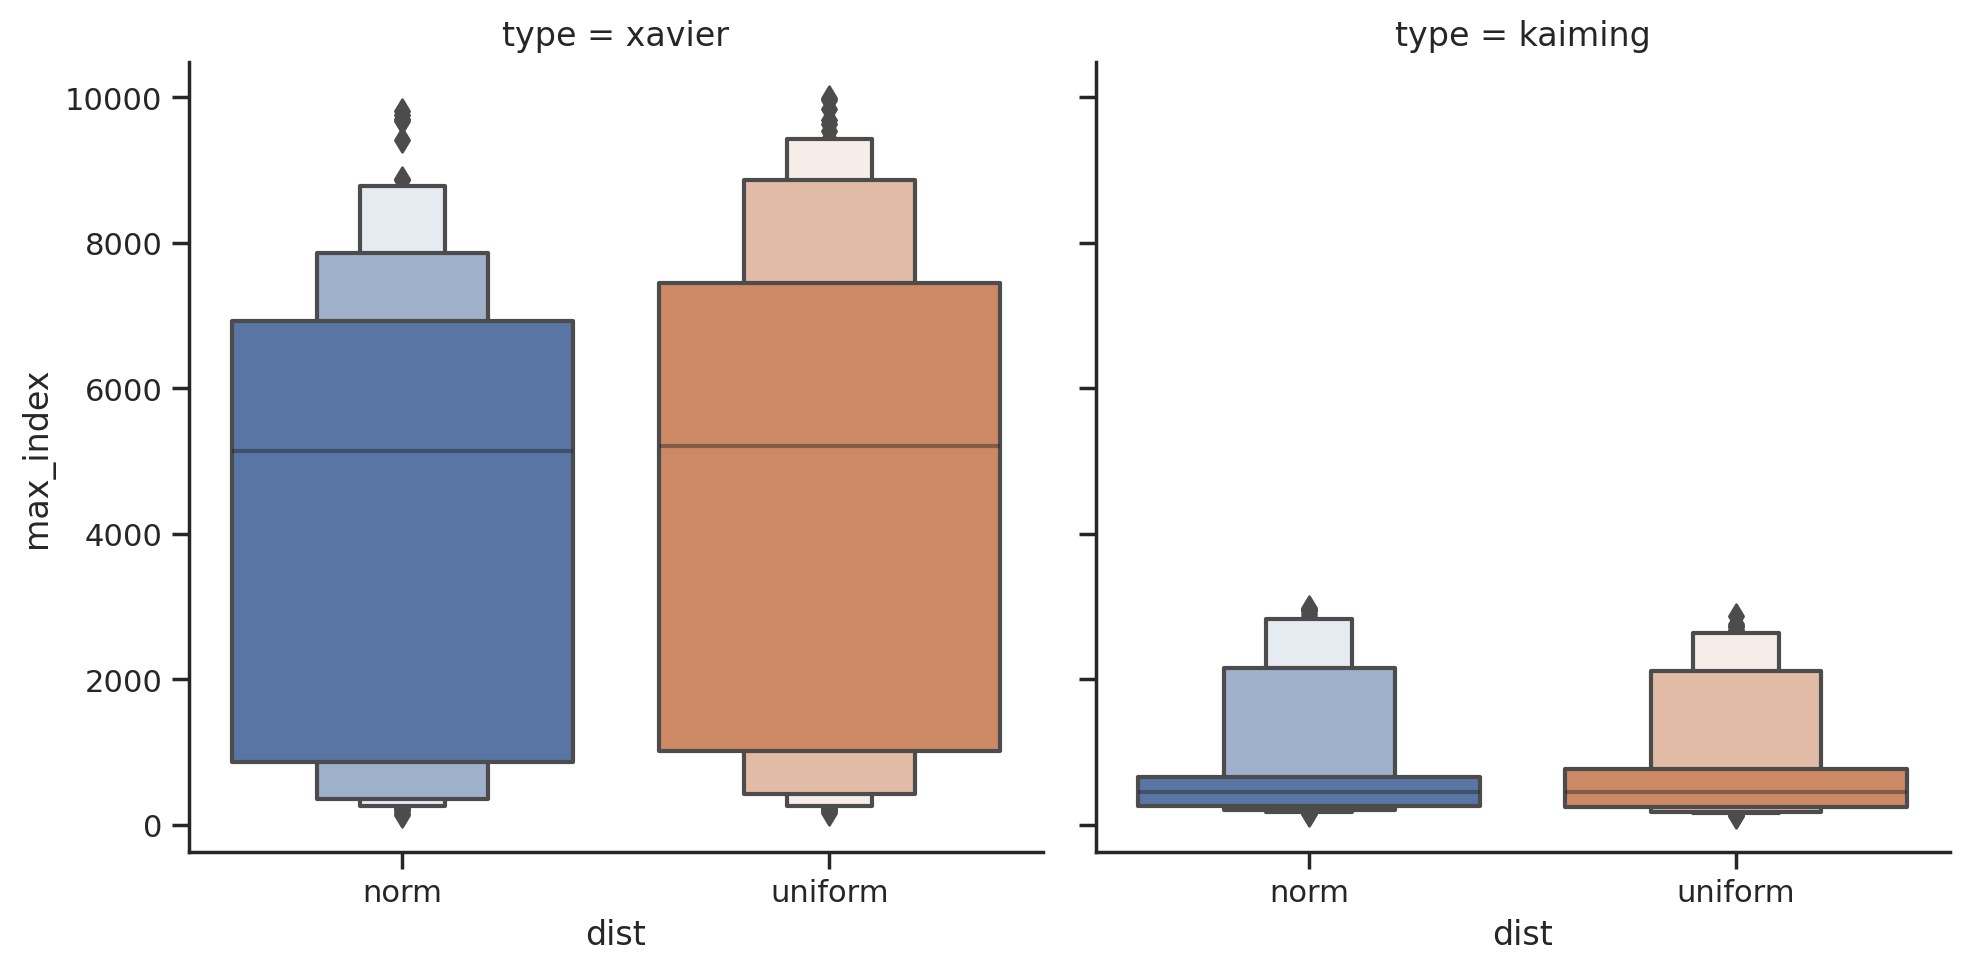

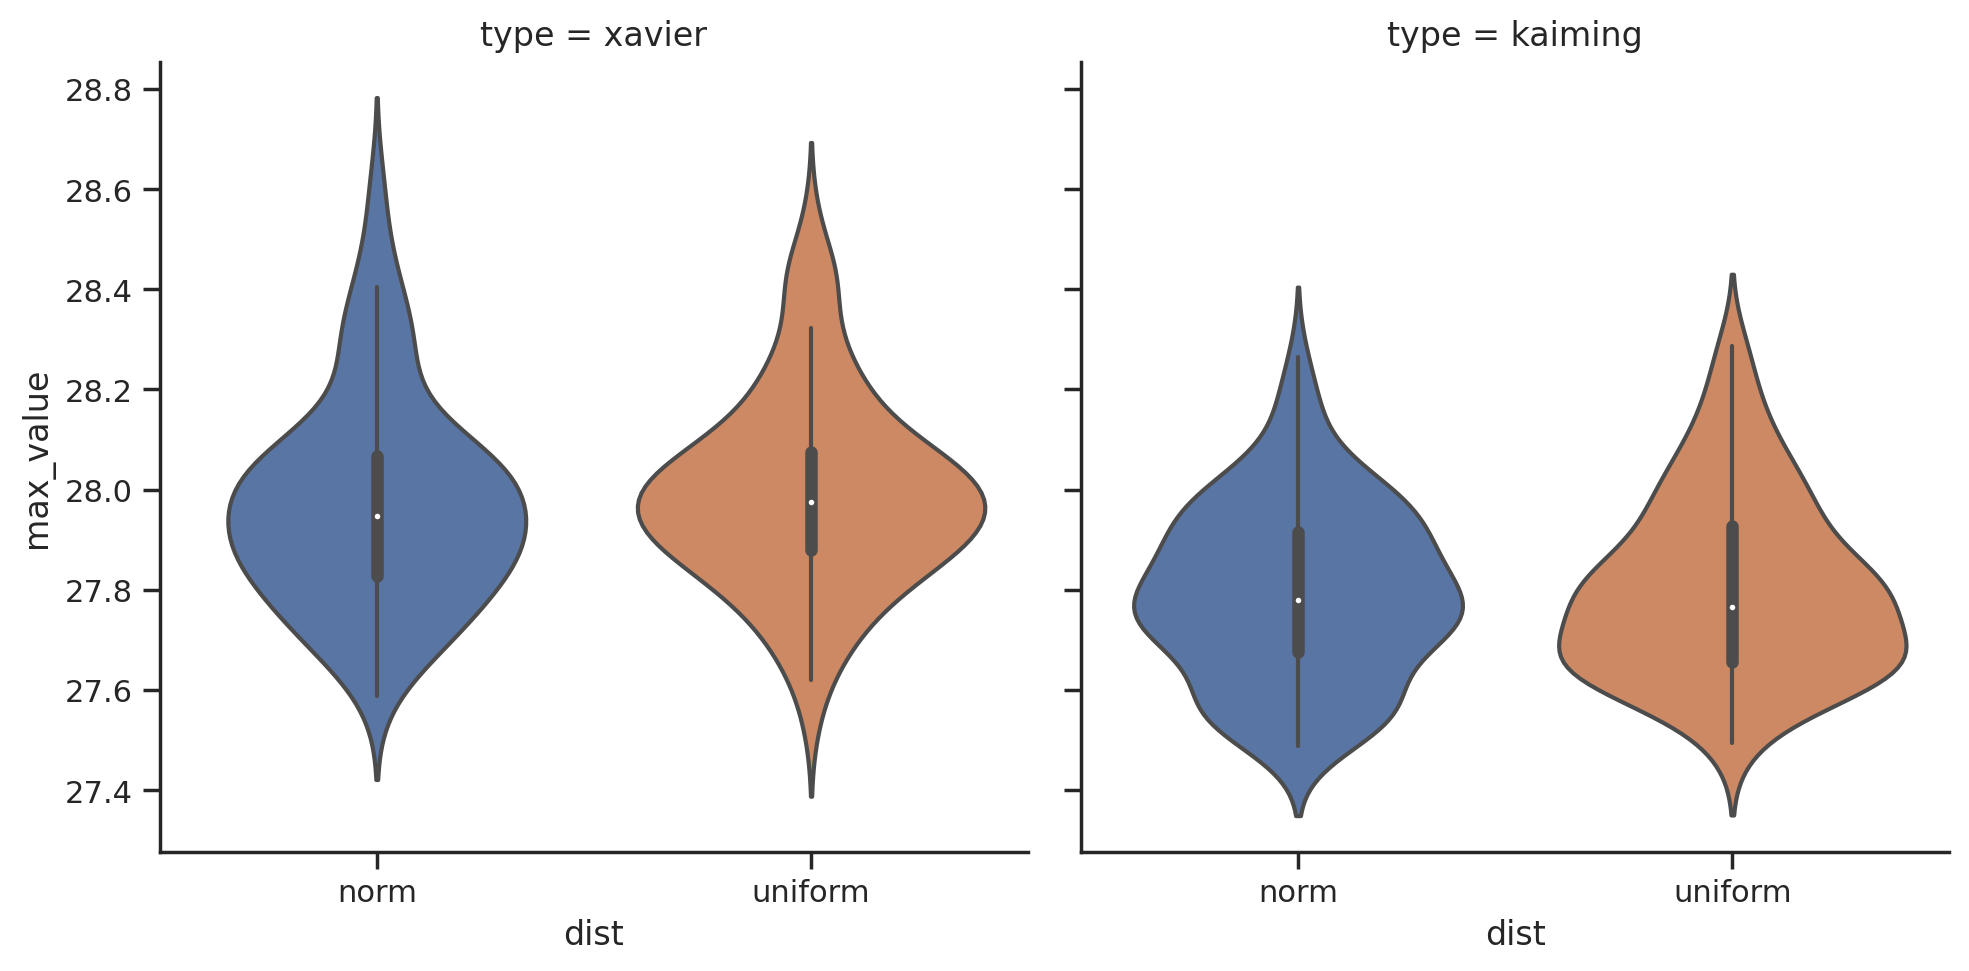

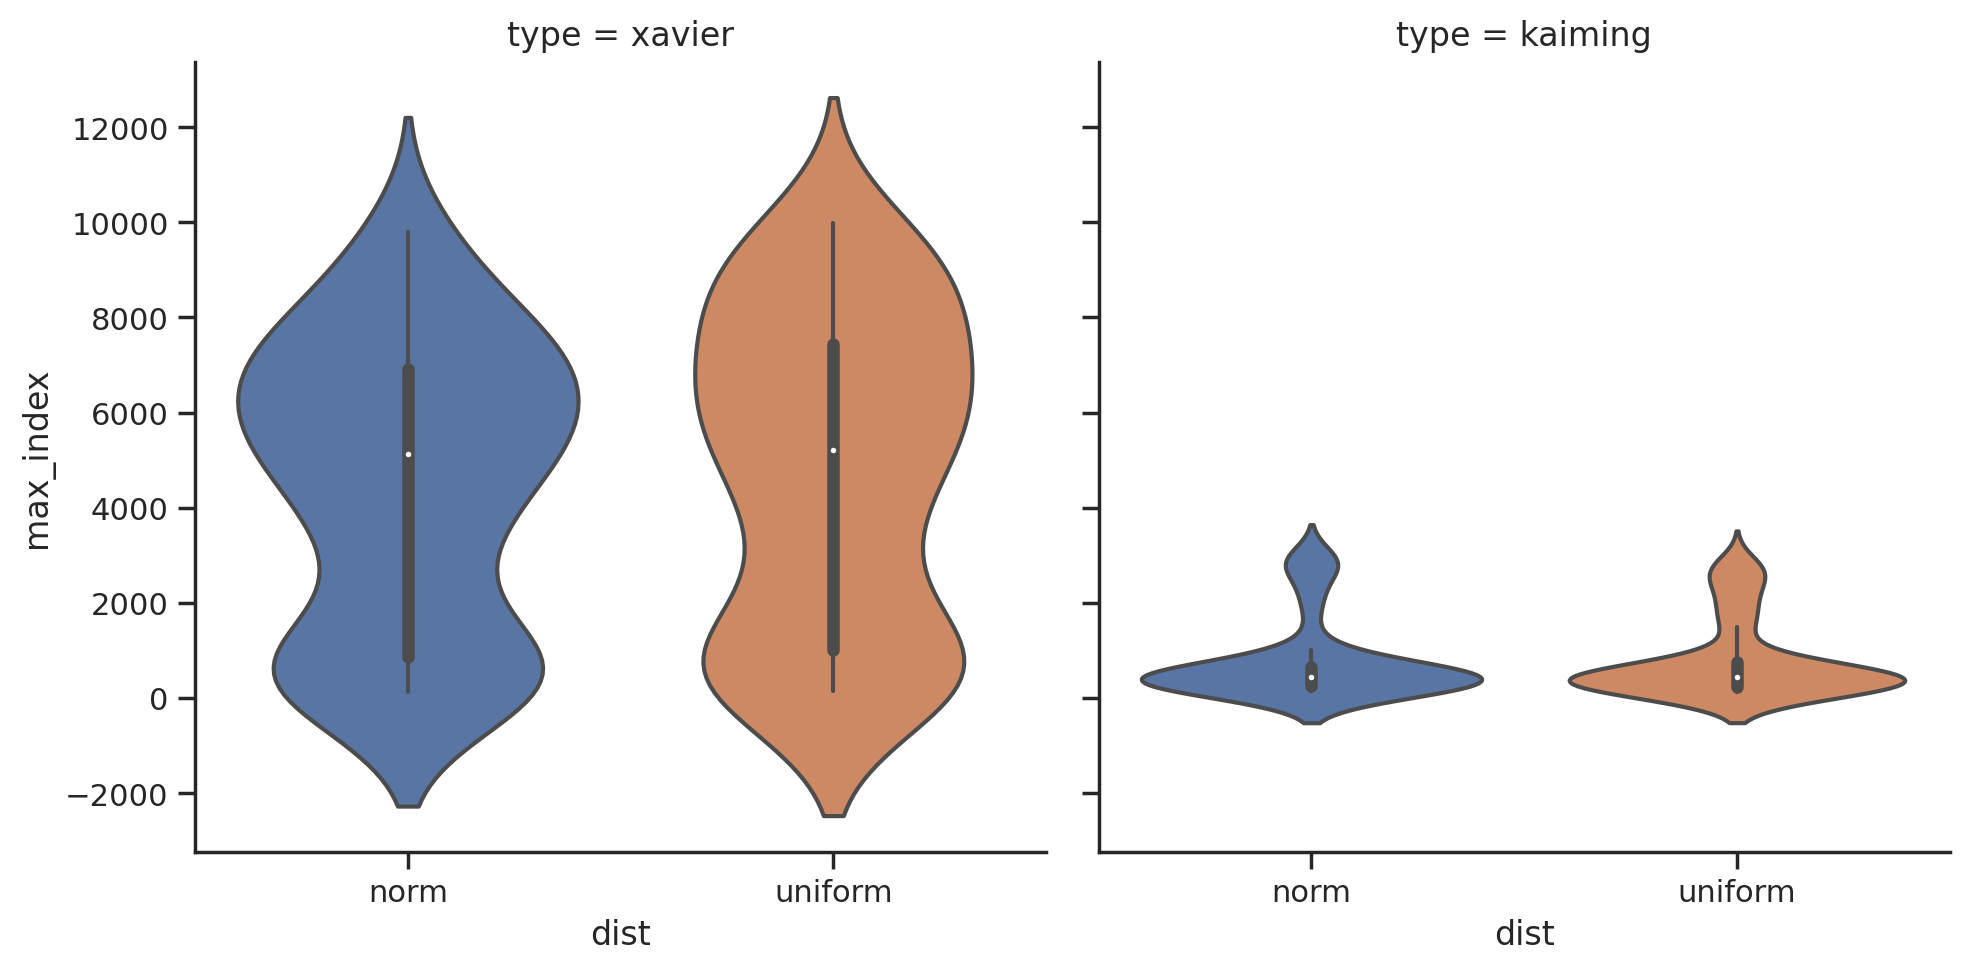

In [6]:
choices = ['box','boxen','violin']
for choice in choices:
    ax = sns.catplot(x='dist',y='max_value',col='type',data=df,kind=choice)
    ax = sns.catplot(x='dist',y='max_index',col='type',kind=choice,data=df);



Text(-0.2, 27.810133187264974, 'n: 100')

Text(0.2, 27.810133187264974, 'n: 100')

Text(0.8, 27.79644488402716, 'n: 100')

Text(1.2, 27.79644488402716, 'n: 100')

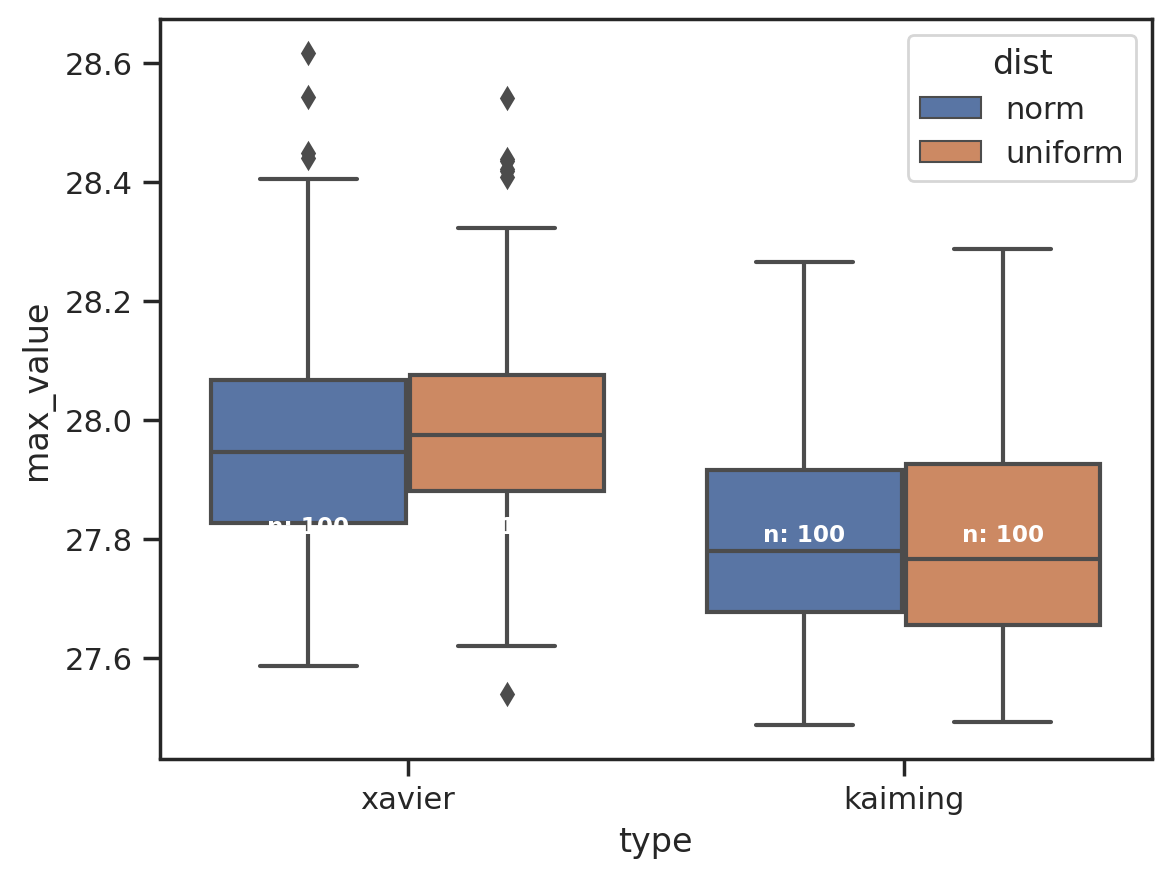

In [7]:

ax = sns.boxplot(x='type',y='max_value',hue='dist',data=df);

medians = df.groupby(['type','dist'])['max_value'].median().values
# print(medians)
# 统计各个种类的样本数
nobs = df[['type','dist']].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
# print(nobs)
# 在中位数上放标签
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick]-0.2, medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
    ax.text(pos[tick]+0.2, medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [8]:
print(df_brut.columns)

Index(['test', 'type', 'dist', '0', '1', '2', '3', '4', '5', '6',
       ...
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
      dtype='object', length=103)


In [9]:
choices = ['scatter','line']
for choice in choices:
    ax = sns.relplot(x='test',y=[str(x) for x in list(range(100))],hue='dist',col='type',kind=choice,data=df_brut);




ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 26000 and the vector passed to `y` has length 100.